# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
scatterplot: C'est une représentation à l'aide d'un nuavge de points utilisée pour représenter la relation entre deux variables continues. C'est utilisé pour identifier des corrélations entre les données mesurées.

barplot: C'est une représentation graphique à l'aide de barres utilisée pour représenter les différentes valeurs d'une variable catégorielle.
C'est utilisé pour la comparaison de données de catégories discrètes.

boxplot: C'est une représentation utilisée pour comparer un même caractère dans deux populations de taille différentes, se résumant seulement à quelques indicateurs (minimum, quartile, médiane etc..)

violinplot: Celui-ci est utilisé pour comparer la distribution de probabilités, permettant de comparer les valeurs mesurées dans plusieurs groupes pour pouvoir observer leurs densitées.

histogramme: Permet de représenter la répartition d'une variable aléatoire à l'aide de colonnes dont l'aire est proportionnelle à l'ffectif de la classe.
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
Ce fichier est sous le format csv.
```


Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name  Nom de l'organisme
Kingdom        Division taxonomique: Archaea, Bacteria, Eukaryota, or Viruses
Group                   Eucaryotes : Animaux, Champignons, Plantes, Protistes.
                        Procaryotes : Groupe correspondant au phylum.
                        Virus : Groupes définis comme le premier niveau (non classé) en dessous du royaume des Virus.

SubGroup        Niveau de taxonomie du NCBI en dessous du groupe :
                Eucaryotes : Mammifères, Oiseaux, Poissons, Vers plats, Insectes, Amphibiens,
                Reptiles, Nématodes, Ascomycètes, Basidiomycètes, Plantes terrestres, Algues vertes,
                Apicomplexés, Kinétoplastidés.
                Procaryotes : Les sous-groupes correspondent au niveau de la classe.
                Virus : Les sous-groupes correspondent aux familles, y compris les genres flottants.

Size (Mb)      Taille du génome estimée (en Mega Base)
Chrs           nombre de chromosomes
Organelles     Nombre d'organites
Plasmids       Nombre de plasmide
BioProjects    Nombre de projets de séquençage de génomes
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [49]:
import pandas as pd

df = pd.read_csv("overview.txt", sep="\t", low_memory=False)
print(len(df))

87888


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
Un royaume est le second plus haut rang dans la taxonomie, derrière le domaine.
Les bactéries: Ce sont des organismes unicellulaires procaryotes, à structure très simple.
Les Virus: Ce sont des agents infectieux nécessitant un hôte pour se reproduire
Les eukaryotes: Ce groupe comprend des organismes à cellules complexes ayant un noyau structuré.
Les archaea: Ce sont des organismes unicellulaires procaryotes, ayant des membranes lipidiques disctinctes.
```

Q6. Combien de royaumes sont présents dans la base ?

In [4]:
print(df.Kingdom.unique().size)

4


Q7. Affichez le nombre d’organismes pour chaque royaume.

In [6]:

for kingdoms in df['Kingdom'].unique():
    print(kingdoms + ": " + str((df['Kingdom'] == kingdoms).sum()))


Bacteria: 37492
Viruses: 32573
Eukaryota: 15560
Archaea: 2263


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Par royaumes, c'est le groupes d'organismes couramment utilisés.
```

Q9. Combien de groupes sont présents par royaume ?

In [7]:
for kingdoms in df['Kingdom'].unique():
    groupes_distincts = df[df['Kingdom'] == kingdoms]['Group'].nunique()
    print(f"{kingdoms}: {groupes_distincts}")

Bacteria: 37
Viruses: 8
Eukaryota: 5
Archaea: 11


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [8]:
for kingdoms in df['Kingdom'].unique():
    for group in df[df['Kingdom'] == kingdoms]['Group'].unique():
        count_organisms = len(df[(df['Kingdom'] == kingdoms) & (df['Group'] == group)])
        print(f"{kingdoms}: {group}: {count_organisms}")

Bacteria: Terrabacteria group: 13337
Bacteria: unclassified Bacteria: 346
Bacteria: FCB group: 5037
Bacteria: Pseudomonadota: 11098
Bacteria: Acidobacteriota: 256
Bacteria: Synergistota: 85
Bacteria: Bacteria incertae sedis: 3872
Bacteria: PVC group: 1091
Bacteria: Myxococcota: 146
Bacteria: Campylobacterota: 256
Bacteria: Thermodesulfobacteriota: 568
Bacteria: Spirochaetota: 344
Bacteria: Aquificota: 42
Bacteria: Thermotogota: 72
Bacteria: Atribacterota: 43
Bacteria: Other: 2
Bacteria: Bdellovibrionota: 122
Bacteria: delta/epsilon subdivisions: 288
Bacteria: Caldisericota/Cryosericota group: 21
Bacteria: Deferribacterota: 27
Bacteria: Calditrichota: 10
Bacteria: Candidatus Lernaellota: 2
Bacteria: Elusimicrobiota: 118
Bacteria: Fusobacteriota: 79
Bacteria: Candidatus Deferrimicrobiota: 2
Bacteria: Nitrospinota/Tectimicrobiota group: 39
Bacteria: Candidatus Hinthialibacterota: 2
Bacteria: Candidatus Krumholzibacteriota: 4
Bacteria: Nitrospirota: 156
Bacteria: Candidatus Moduliflexota: 

## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

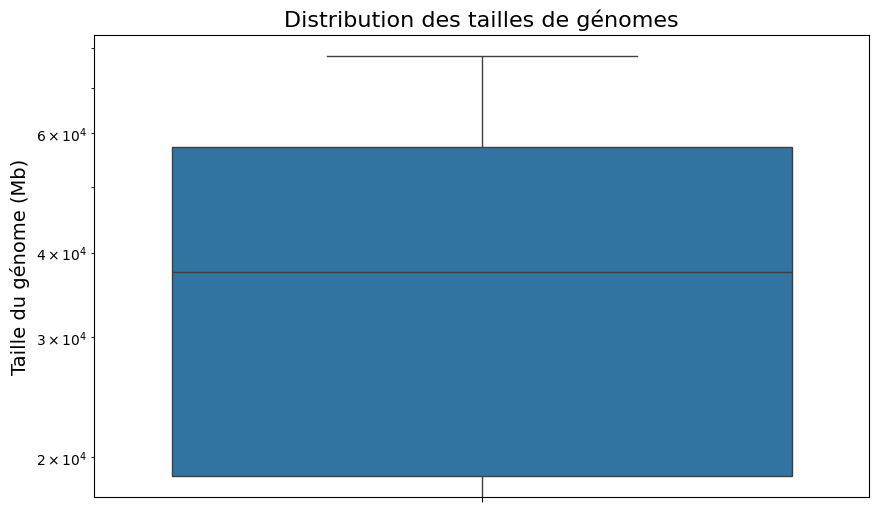

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(y=df["Size (Mb)"])

plt.yscale("log")
plt.gca().invert_yaxis()

plt.title('Distribution des tailles de génomes', fontsize=16)
plt.ylabel('Taille du génome (Mb)', fontsize=14)

plt.show()


Q12. Affichez la distribution par royaume.

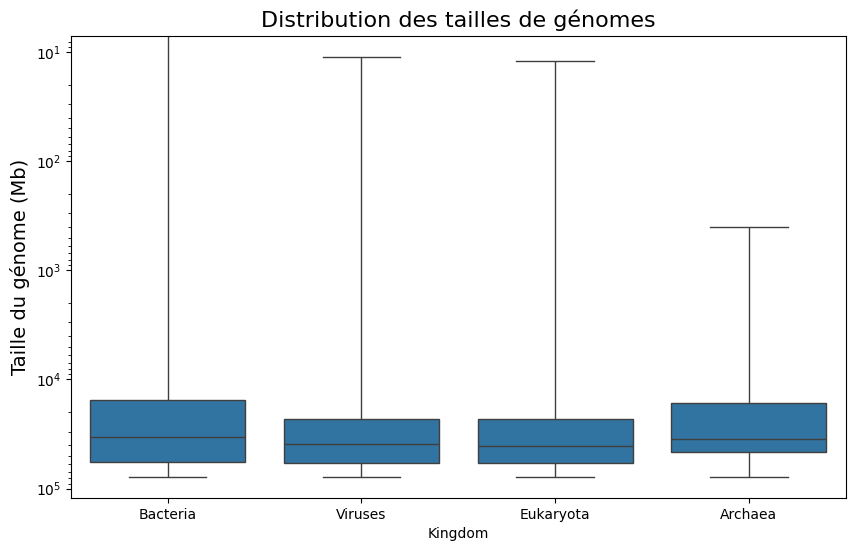

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(10,6))
sns.boxplot(y=df["Size (Mb)"], x=df["Kingdom"])

plt.yscale("log")

plt.title('Distribution des tailles de génomes', fontsize=16)
plt.ylabel('Taille du génome (Mb)', fontsize=14)

plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

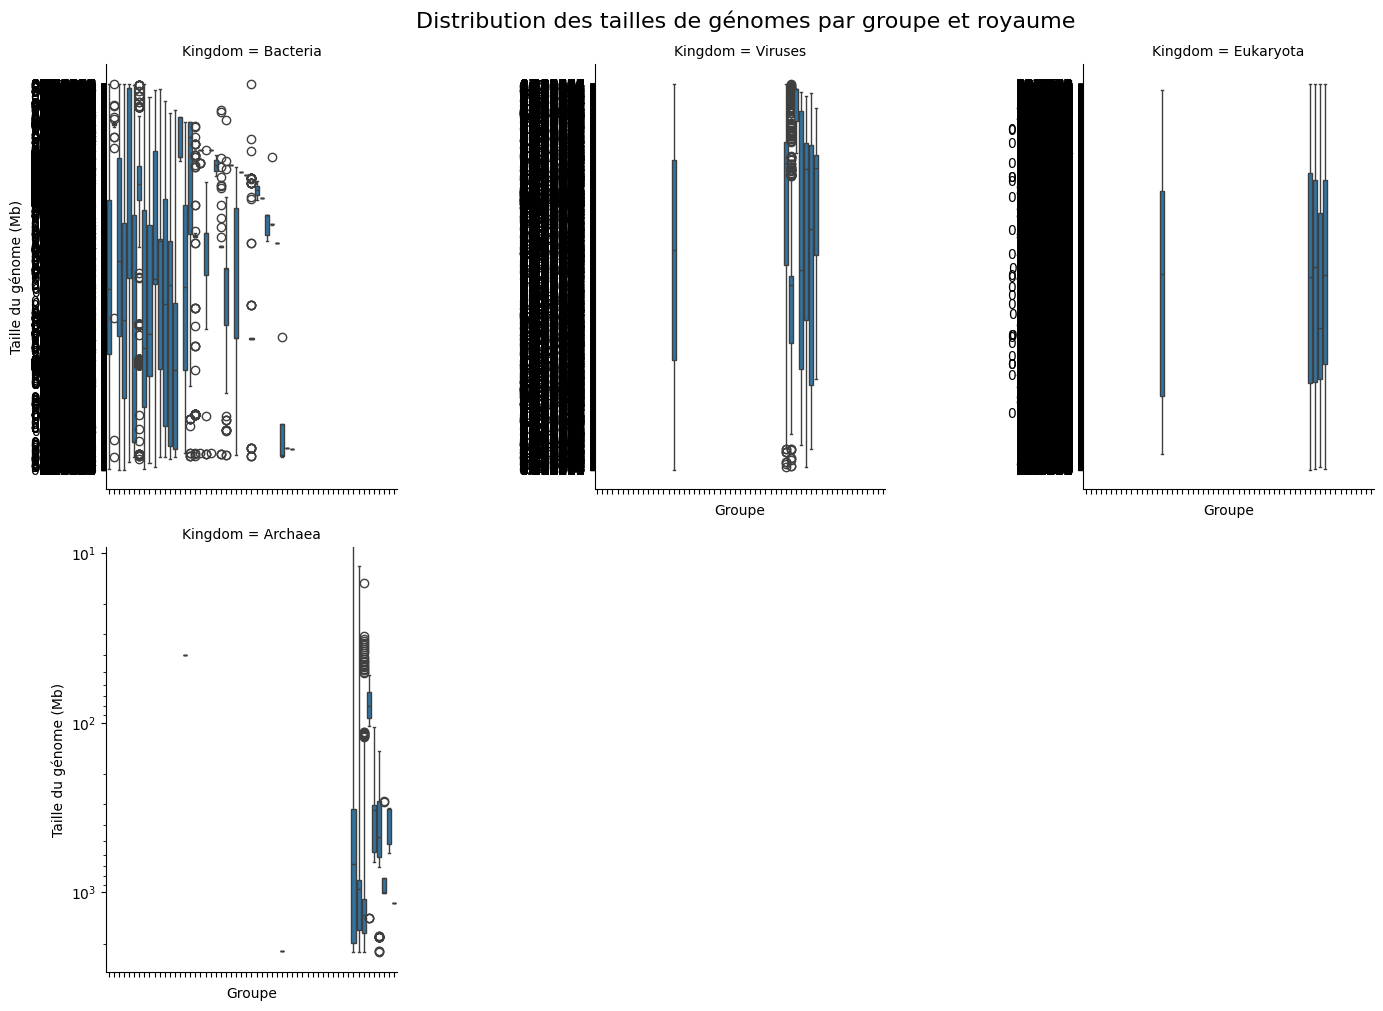

In [20]:
g = sns.FacetGrid(df, col="Kingdom", col_wrap=3, sharey=False, height=5)
g.map_dataframe(sns.boxplot, x="Group", y="Size (Mb)")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Groupe", "Taille du génome (Mb)")
g.fig.suptitle("Distribution des tailles de génomes par groupe et royaume", fontsize=16, y=1.02)

plt.yscale("log")
plt.show()



Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [18]:
for kingdom in df['Kingdom'].unique():
    df_k = df[df['Kingdom'] == kingdom]

    min_index = df_k['Size (Mb)'].idxmin()
    min_genome_row = df_k.loc[min_index]

    print(f"{kingdom}: {min_genome_row['#Organism/Name']}: {min_genome_row['Size (Mb)']} Mb")



Bacteria: bacterium AG-323-L21: 0.101587 Mb
Viruses: Hippotragine gammaherpesvirus 1: 0.000174 Mb
Eukaryota: Cephonodes hylas: - Mb
Archaea: candidate division MSBL1 archaeon SCGC-AAA385M02: 0.137797 Mb


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [14]:
for kingdom in df['Kingdom'].unique():
    df_k = df[df['Kingdom'] == kingdom]

    min_index = df_k['Size (Mb)'].idxmax()
    min_genome_row = df_k.loc[min_index]

    print(f"{kingdom}: {min_genome_row['#Organism/Name']}: {min_genome_row['Size (Mb)']} Mb")

Bacteria: Actinomadura physcomitrii: 9.99958 Mb
Viruses: Acinetobacter phage MD-2021a: 4.29842 Mb
Eukaryota: Leucopsar rothschildi: 999.683 Mb
Archaea: Candidatus Lokiarchaeota archaeon: 9.04767 Mb


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

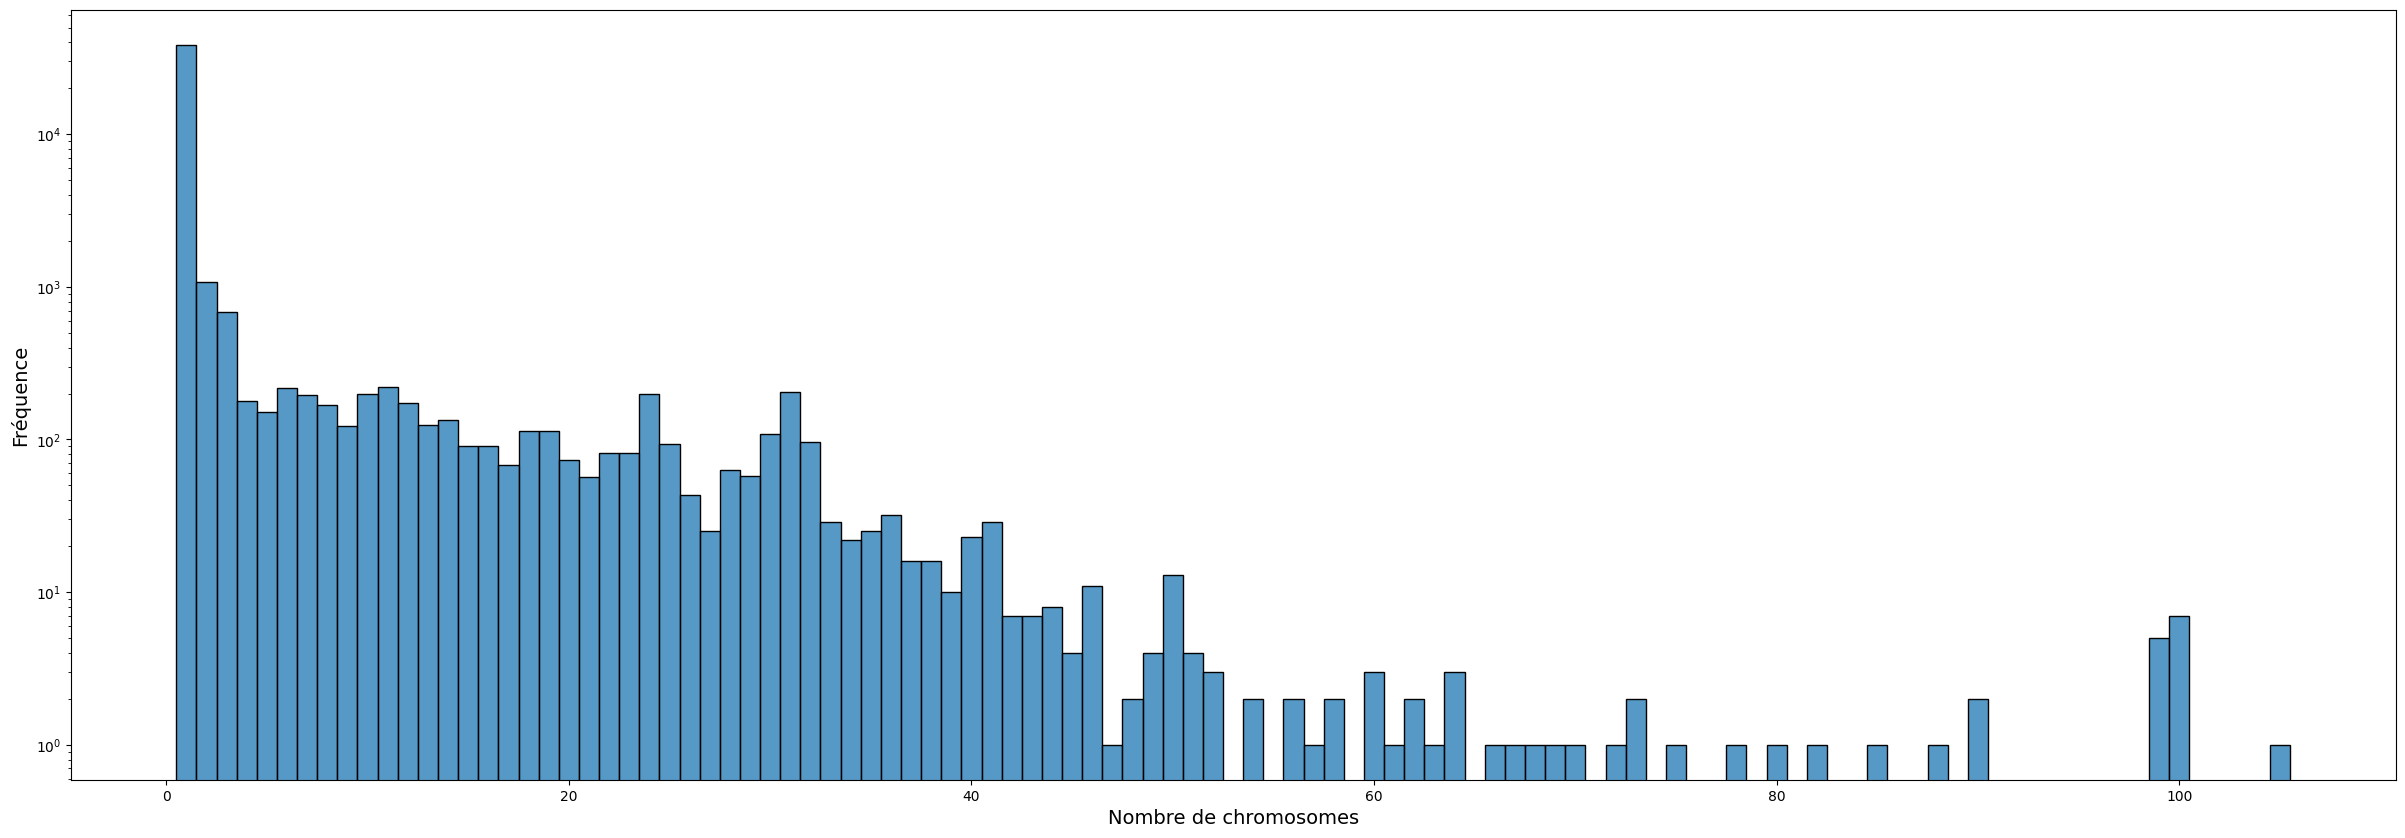

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df["Chrs"] = pd.to_numeric(df["Chrs"], errors="coerce")
df_sorted = df.sort_values(['Chrs'])


plt.figure(figsize=(30,10))
sns.histplot(data=df_sorted, x="Chrs", discrete="True")
plt.yscale("log")
plt.xlabel('Nombre de chromosomes', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

plt.show()

Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

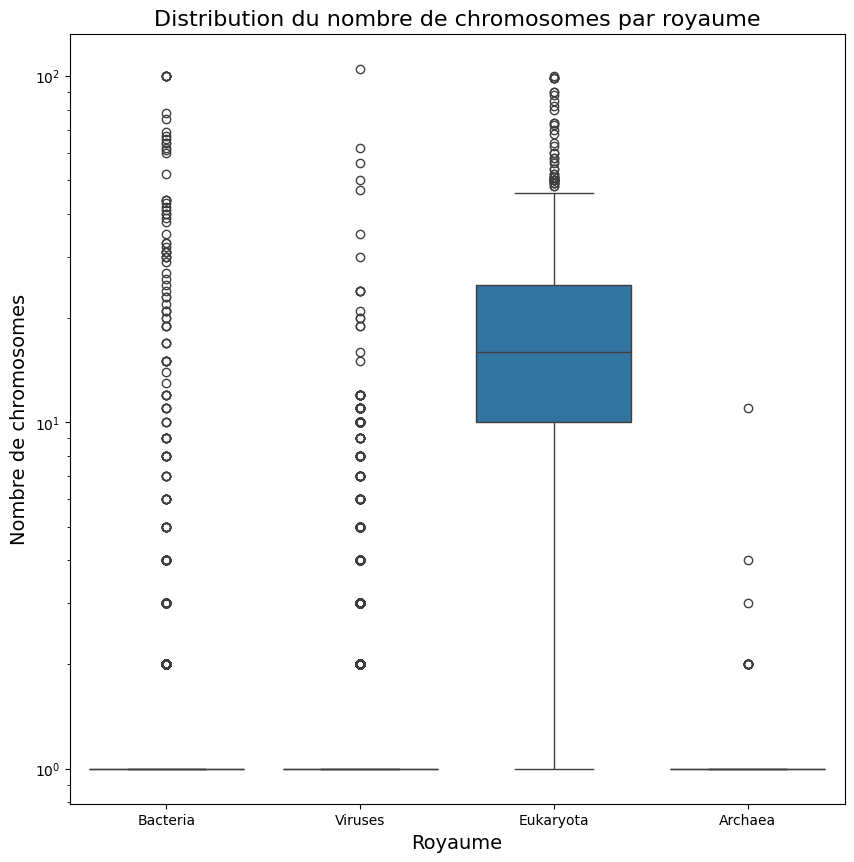

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
df_sorted = df.sort_values(['Chrs'])

sns.boxplot(x=df["Kingdom"], y=df["Chrs"])
plt.yscale("log")
plt.xlabel("Royaume", fontsize=14)
plt.ylabel("Nombre de chromosomes", fontsize=14)
plt.title("Distribution du nombre de chromosomes par royaume", fontsize=16)

plt.show()


Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown

Les bactéries, virus et archaea ont majoritairement
 un faible nombre de chromosomes, et ce sont les
 virus qui ont le plus faible monstre. Les eucaryotes
ont quand à eux une grande variabilité
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

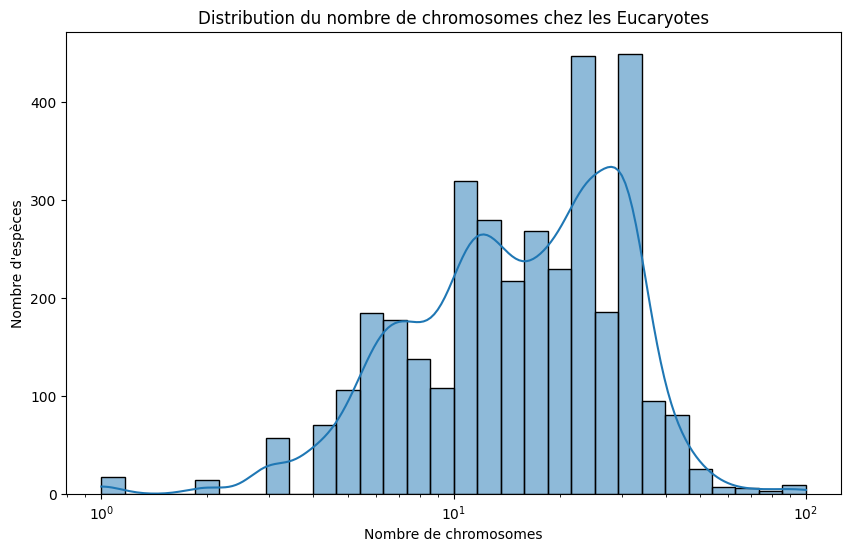

In [30]:
plt.figure(figsize=(10, 6))
eukaryotes = df[df["Kingdom"] == "Eukaryota"]

sns.histplot(eukaryotes["Chrs"], bins=30, log_scale=True, kde=True)
plt.xlabel("Nombre de chromosomes")
plt.ylabel("Nombre d'espèces")
plt.title("Distribution du nombre de chromosomes chez les Eucaryotes")

plt.show()



Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

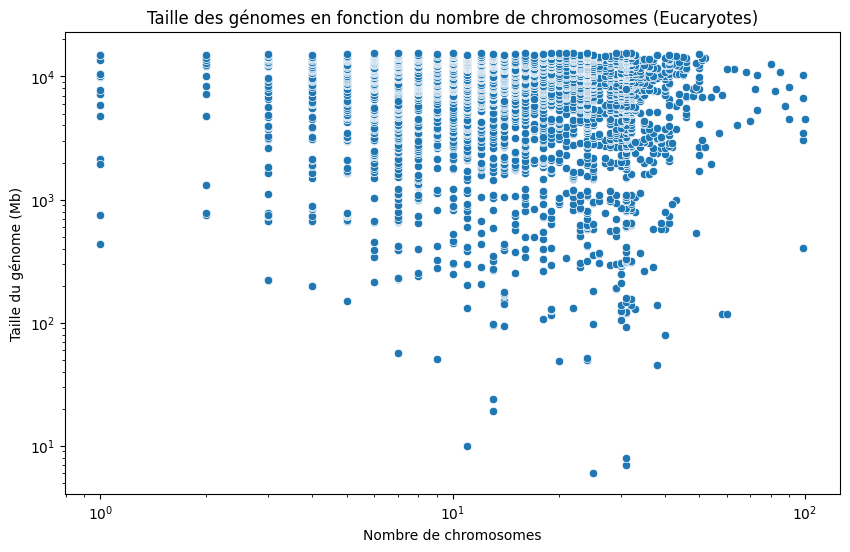

In [31]:
plt.figure(figsize=(10, 6))
eukaryotes = df[df["Kingdom"] == "Eukaryota"]

sns.scatterplot(x=eukaryotes["Chrs"], y=eukaryotes["Size (Mb)"])

plt.xscale("log")
plt.yscale("log")
plt.gca().invert_yaxis()

plt.xlabel("Nombre de chromosomes")
plt.ylabel("Taille du génome (Mb)")
plt.title("Taille des génomes en fonction du nombre de chromosomes (Eucaryotes)")

plt.show()


Q21. Qu’observez-vous ?

```markdown
Les génomes de grande taille n’ont pas nécessairement plus de chromosomes
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Un plasmide est une petite molécule d’ADN
circulaire, distincte du chromosome, qui se
réplique de manière autonome et est souvent impliquée dans le transfert de gènes entre
bactéries.
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

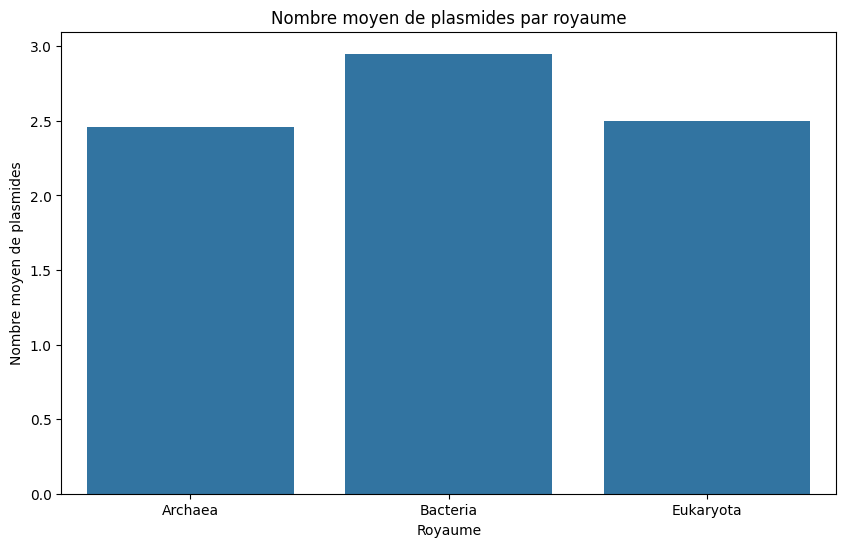

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Plasmids"] = pd.to_numeric(df["Plasmids"], errors='coerce')
plasmid_means = df.groupby("Kingdom")["Plasmids"].mean().dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=plasmid_means.index, y=plasmid_means.values)

plt.ylabel("Nombre moyen de plasmides")
plt.xlabel("Royaume")
plt.title("Nombre moyen de plasmides par royaume")

plt.show()


Q24. Qu'observez-vous ?

```markdown
Les virus n'en possèdent pas
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
Les études autour des organismes
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

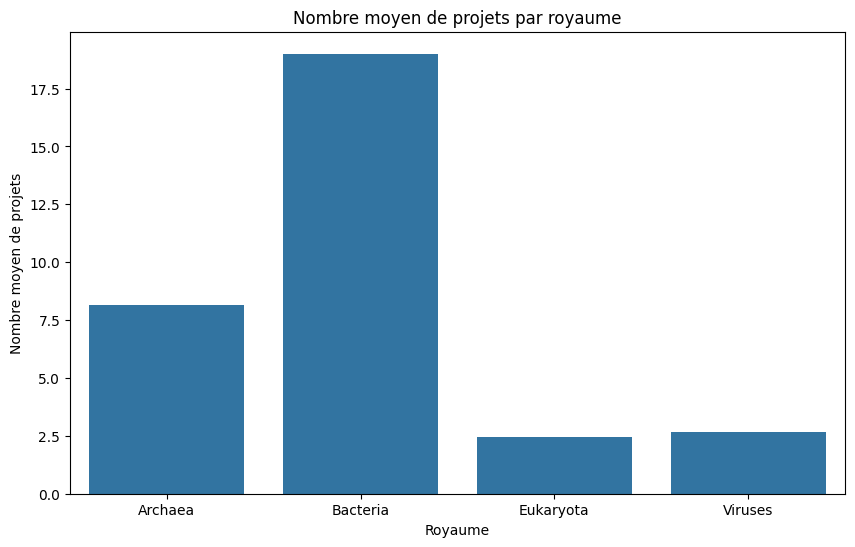

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df["BioProjects"] = pd.to_numeric(df["BioProjects"], errors='coerce')

bio_project_means = df.groupby("Kingdom")["BioProjects"].mean().dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=bio_project_means.index, y=bio_project_means.values)

plt.ylabel("Nombre moyen de projets")
plt.xlabel("Royaume")
plt.title("Nombre moyen de projets par royaume")

plt.show()


[link text](https://)Q27. Combien d'organismes ont 0 projets ?

In [41]:
organismes_zero_projets = df[df["BioProjects"] == 0]

nombre_zero_projets = organismes_zero_projets.shape[0]

print(f"Le nombre d'organismes avec 0 projets est : {nombre_zero_projets}")

Le nombre d'organismes avec 0 projets est : 0


Q28. Combien d'organismes ont > 1 projets ?

In [43]:
organismes_zero_projets = df[df["BioProjects"] > 1]

nombre_zero_projets = organismes_zero_projets.shape[0]

print(f"Le nombre d'organismes avec 0 projets est : {nombre_zero_projets}")

Le nombre d'organismes avec 0 projets est : 18947


Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [46]:
top_5_organismes = df.sort_values(by="BioProjects", ascending=False).head(5)

top_5_organismes_info = top_5_organismes[["#Organism/Name", "BioProjects"]]

print(top_5_organismes_info)


                             #Organism/Name  BioProjects
29710                      Escherichia coli      39907.0
41700                 Klebsiella pneumoniae      21229.0
75957                 Staphylococcus aureus      17228.0
70775                   Salmonella enterica      16613.0
83689  uncultured Lachnospiraceae bacterium      15909.0


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Ils sont étudiés en raison de leur impact sur la santé humaine.
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
Ce fichier fournit des informations complètes sur chaque assemblée génomique
```

In [2]:
import pandas as pd

df = pd.read_csv("assembly_summary_genbank_historical.txt", sep="\t", low_memory=False, header=1)
print(len(df))

2549


Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

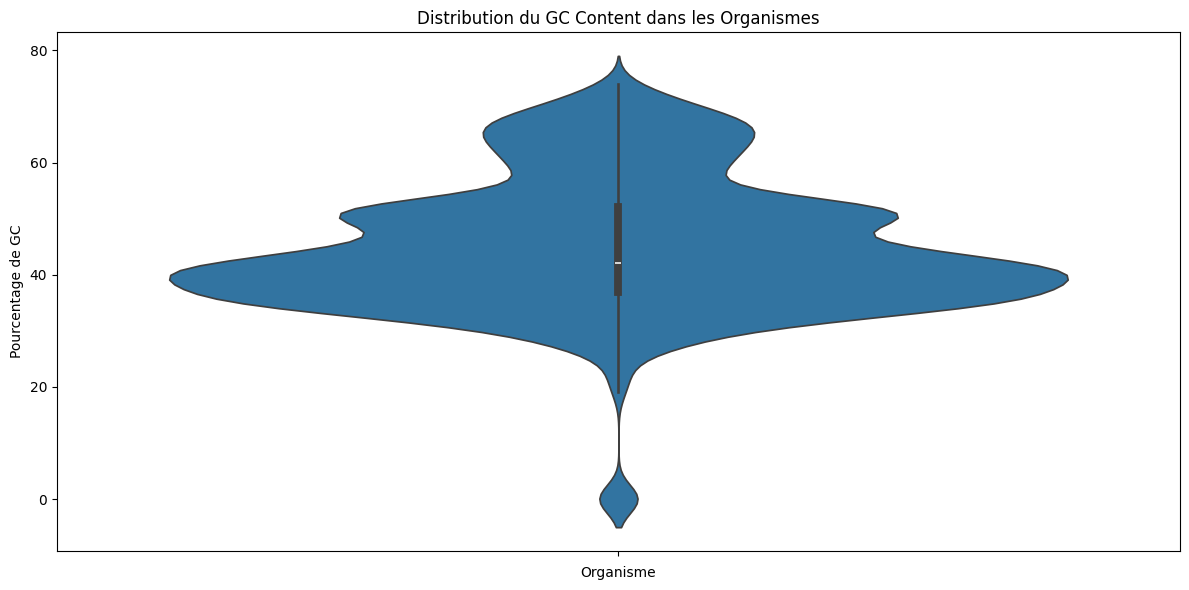

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.violinplot(y="gc_percent", data=df)

plt.title("Distribution du GC Content dans les Organismes")
plt.xlabel("Organisme")
plt.ylabel("Pourcentage de GC")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Q4. Qu'observez-vous ?

```markdown
Il y a une grande concentration à partir de 40%, et très peu en dessous
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

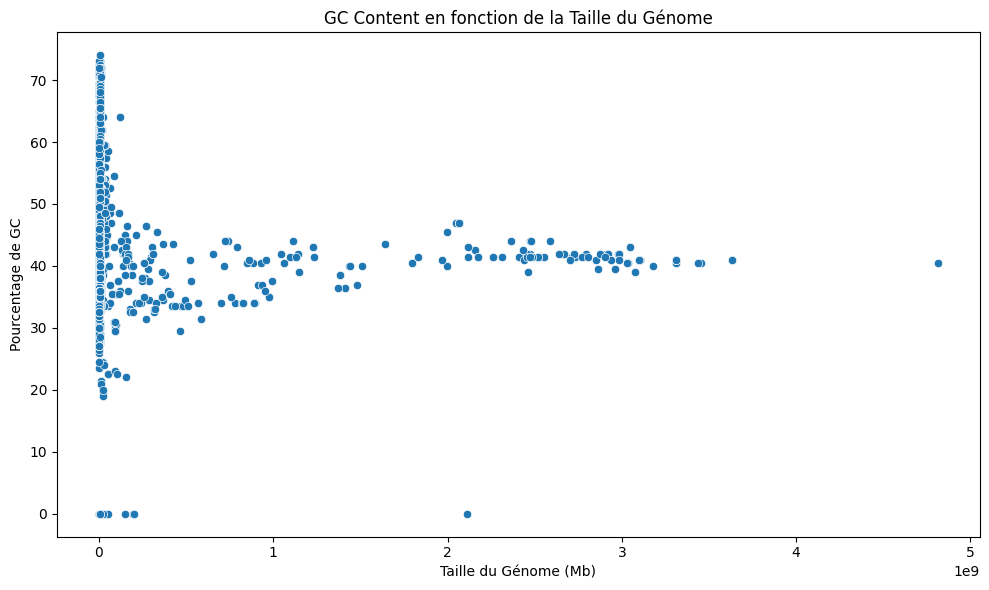

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x="genome_size", y="gc_percent", data=df)

plt.title("GC Content en fonction de la Taille du Génome")
plt.xlabel("Taille du Génome (Mb)")
plt.ylabel("Pourcentage de GC")

plt.tight_layout()
plt.show()


Q6. Qu'observez-vous ?

```markdown
La taille du génome n'influe pas sur le pourcentage de GC, à partir d'une certaine taille il reste à 40% environs
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

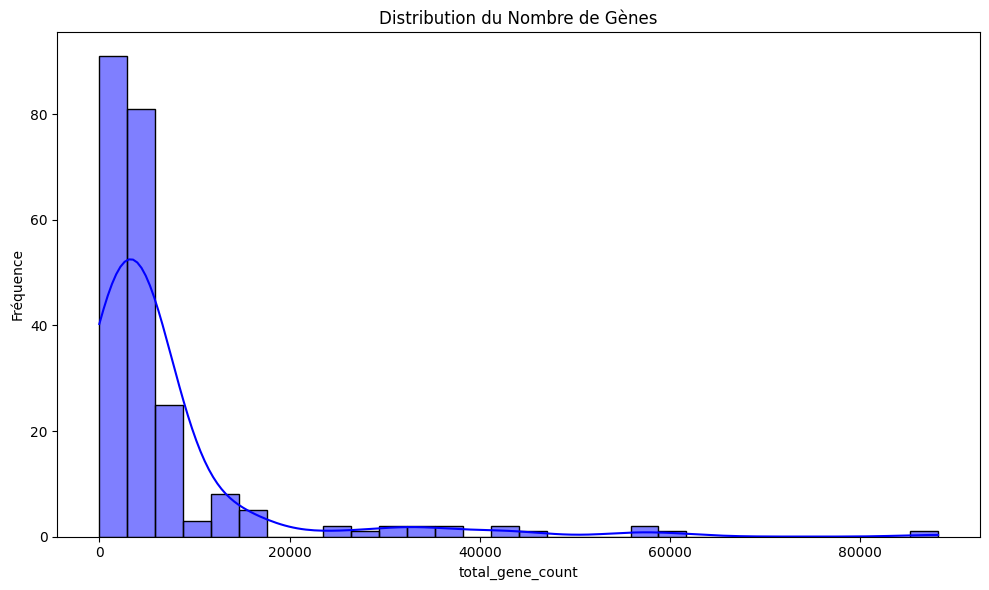

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(df['total_gene_count'], kde=True, color='blue', bins=30)

plt.title("Distribution du Nombre de Gènes")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


Q8. Qu'observez-vous ?

```markdown
Un très grand nombre de valeurs sont à 0 ou presque```

Q9. Enlevez les données aberrantes (outliers)

In [8]:
df['total_gene_count'] = pd.to_numeric(df['total_gene_count'], errors='coerce')
Q1 = df['total_gene_count'].quantile(0.25)
Q3 = df['total_gene_count'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['total_gene_count'] >= lower_bound) & (df['total_gene_count'] <= upper_bound)]

print(f"Taille avant suppression des outliers: {df.shape[0]}")
print(f"Taille après suppression des outliers: {df_no_outliers.shape[0]}")



Taille avant suppression des outliers: 2549
Taille après suppression des outliers: 200


Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
J'ai utilisé l'écart interquartile (IQR) pour supprimer les outliers, en choisissant un seuil de 1,5 fois l'IQR au-dessus de Q3 et en-dessous de Q1.
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

In [11]:
correlation = df_no_outliers['genome_size'].corr(df['total_gene_count'])

print(f"La corrélation entre la taille du génome et le nombre de gènes est : {correlation}")
"Il n'y a pas de corrélation entre la taille du génome et le nombre de gènes"

La corrélation entre la taille du génome et le nombre de gènes est : -0.45968704160074764


"Il n'y a pas de corrélation entre la taille du génome et le nombre de gènes"

# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici